**CO2 Emission Prediction**

In this project we predict the cars CO2 emission based on 12 different features. We will investigate using both linear and polynomial regression models. The dataset used can be downloaded from [Kaggle](https://www.kaggle.com/sarita19/fuel-consumption).


#Load the libraries

In [74]:
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


**Load The Dataset**

In [75]:
df = pd.read_csv('FuelConsumption.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


**Dataset Analysis**

In [76]:
df.shape

(1067, 13)

In [77]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [78]:
# check if any null values in the dataset
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

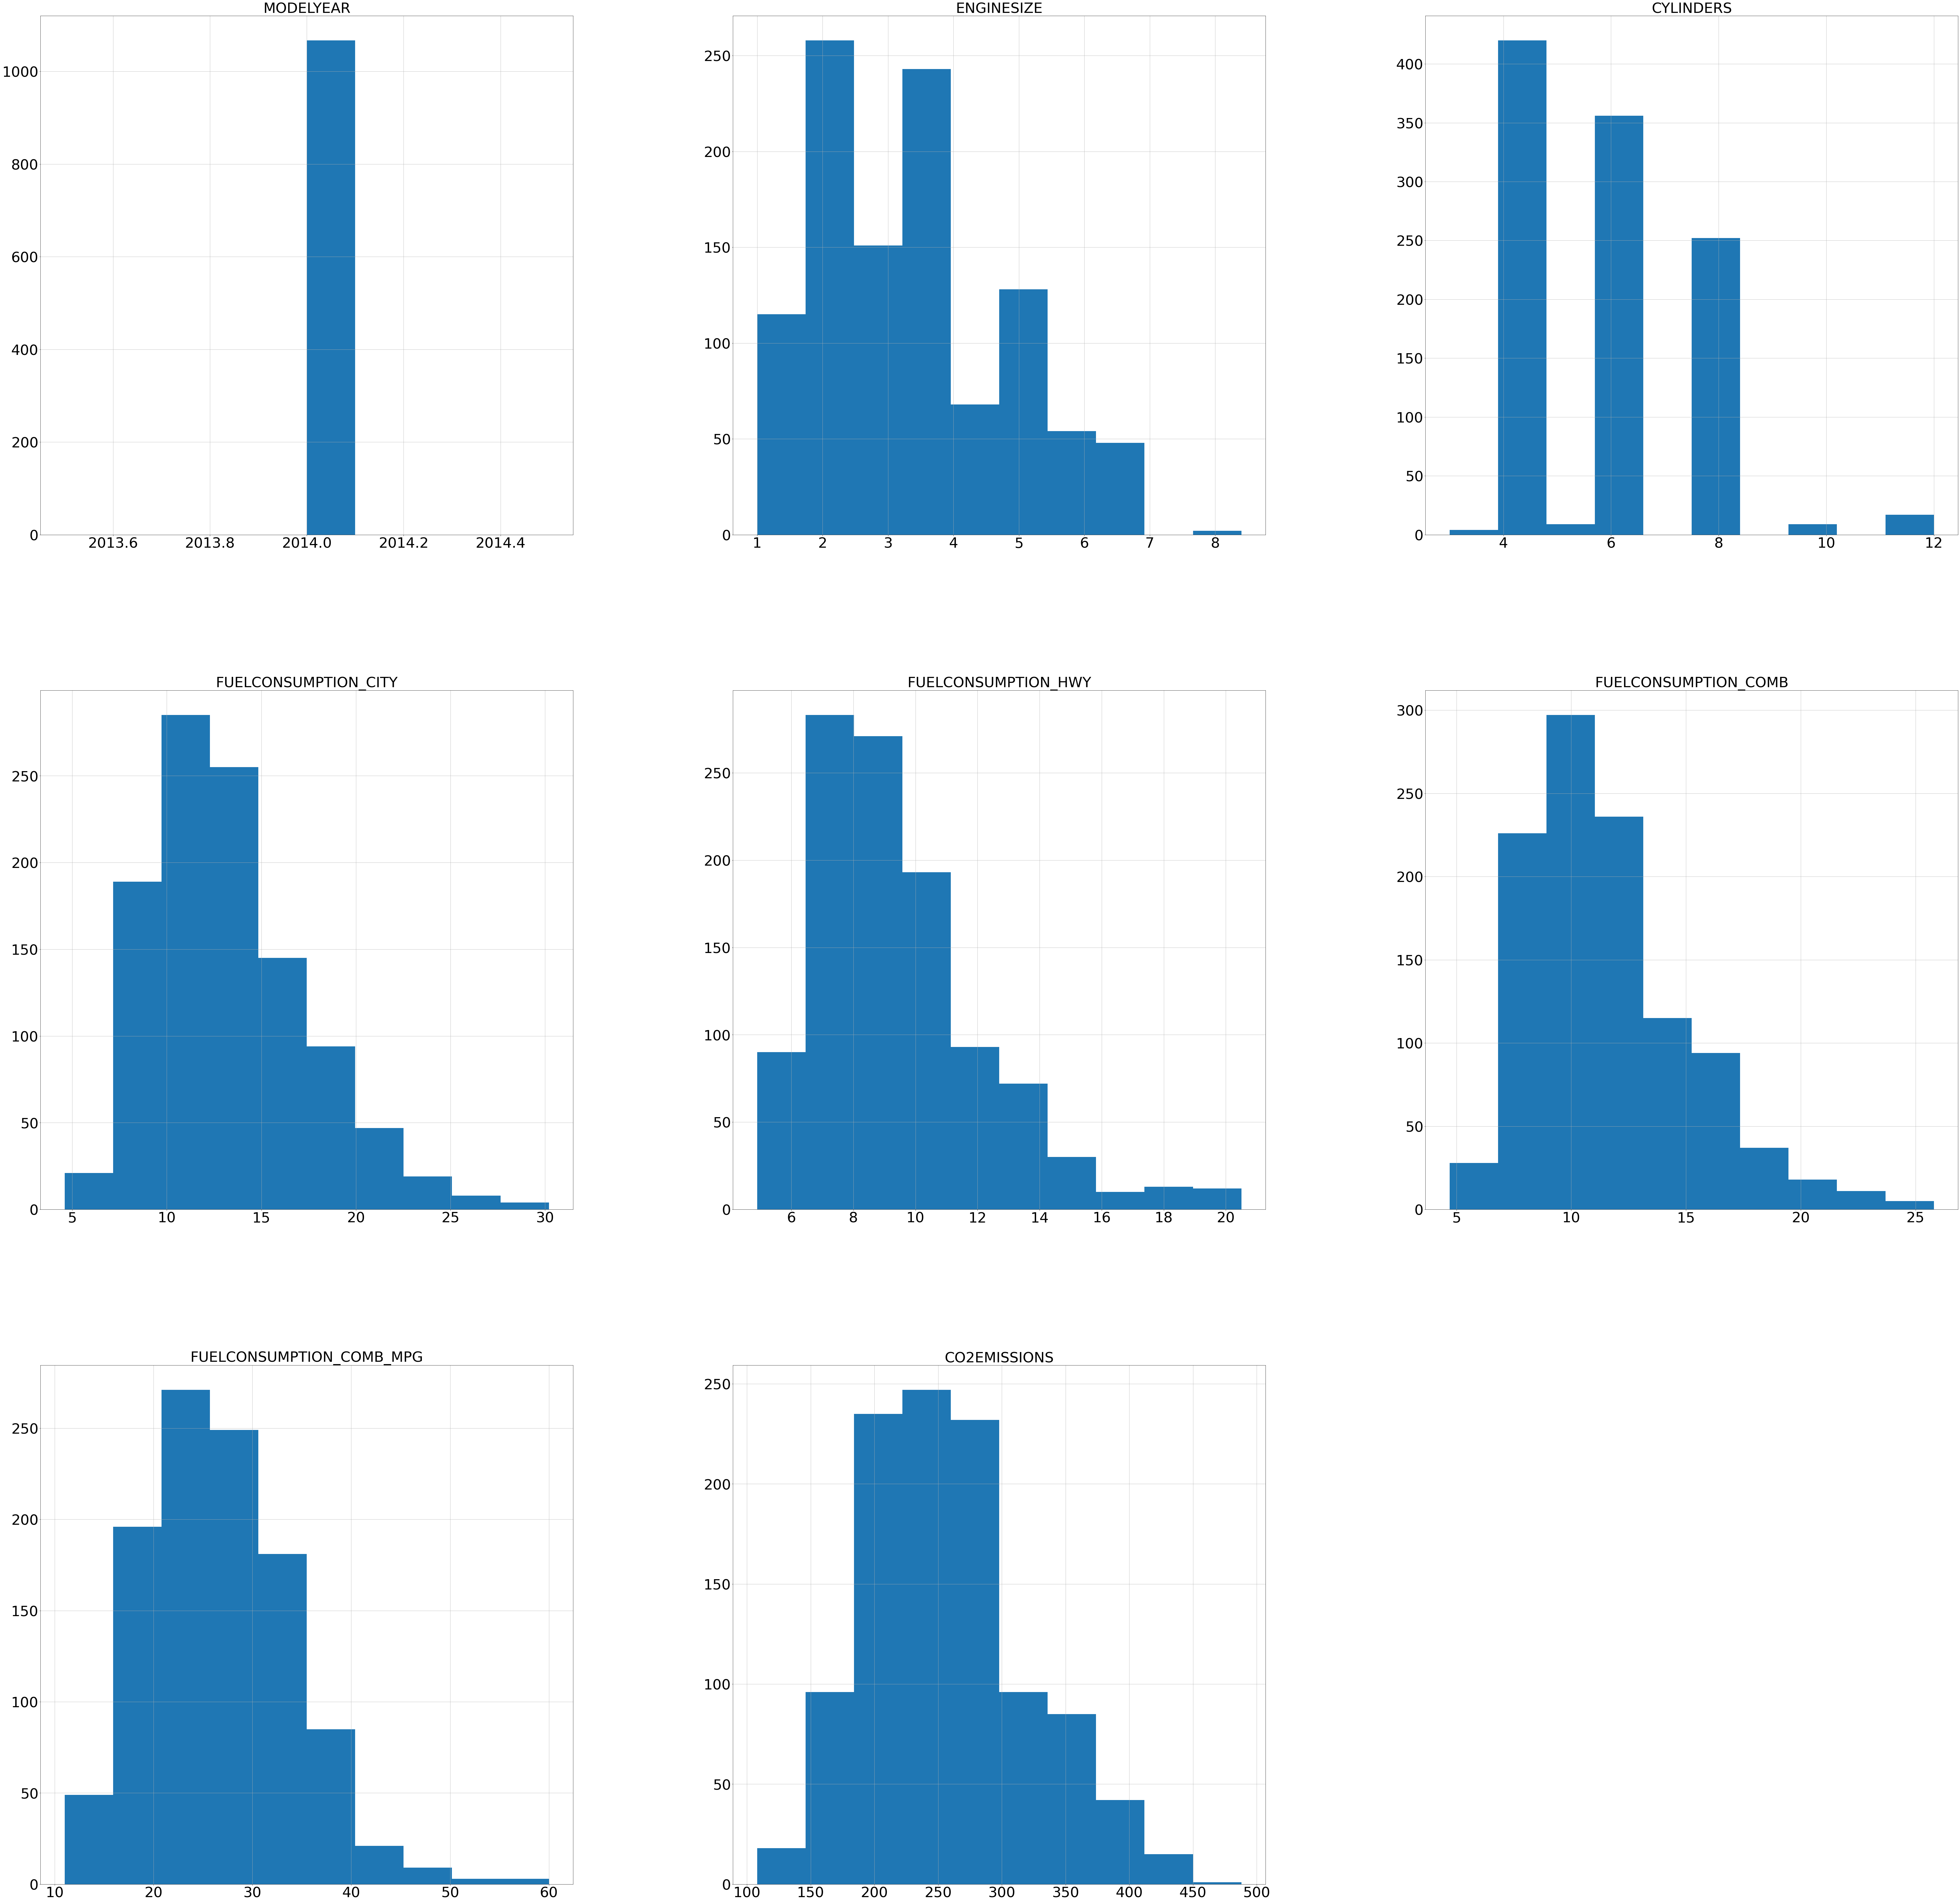

In [79]:
# just quick look at the distribution of the columns values
fig = df.hist(figsize=(120,120),xlabelsize =50,ylabelsize =50)
[x.title.set_size(50) for x in fig.ravel()]
plt.show()

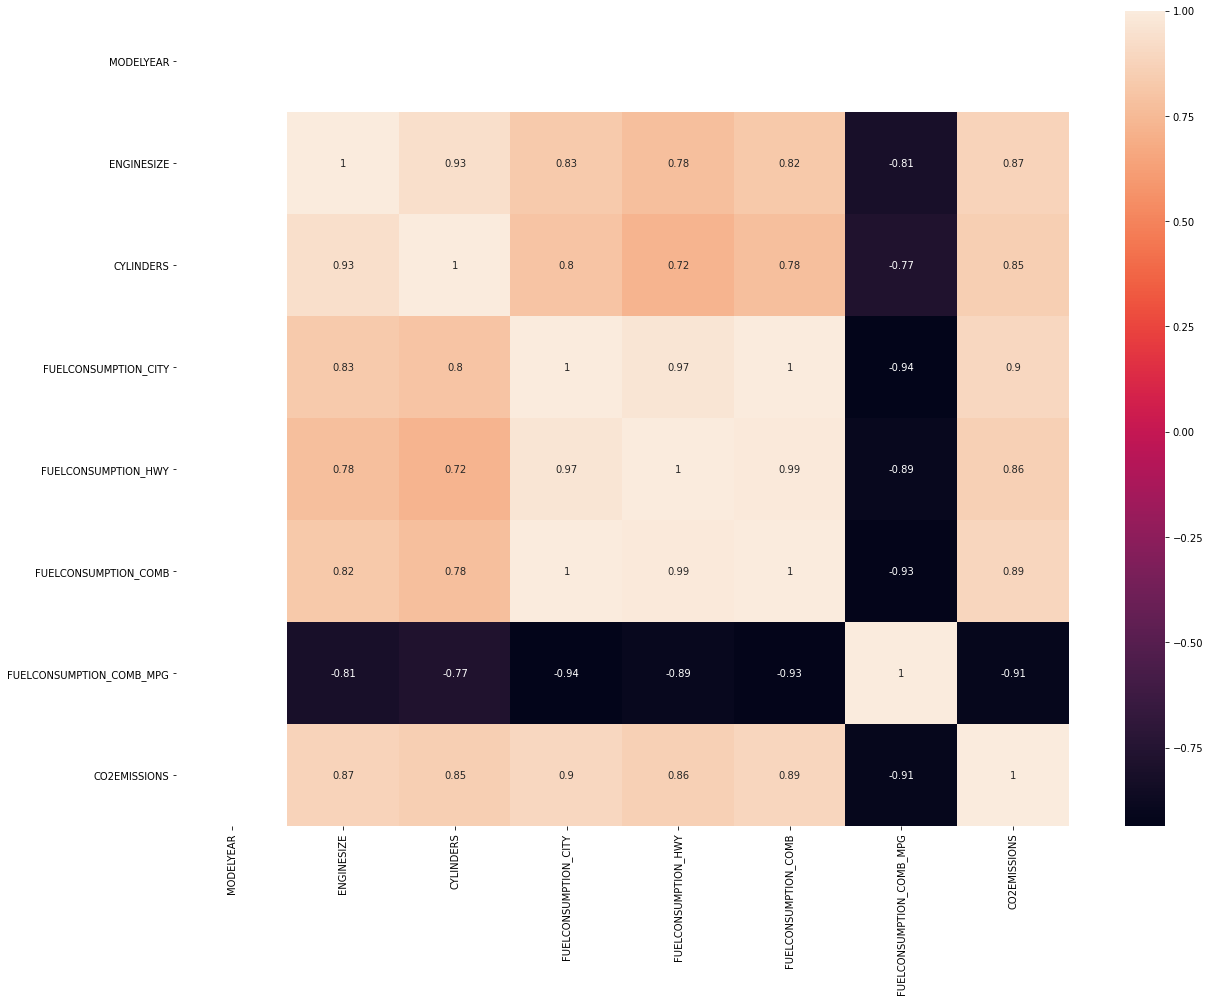

In [80]:
# extract the correlation in the dataset to see what are the features that correalte with the co2 emission
df_corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True)

From the previous corrleation matrix, we can notice two features are postive and negtaive correlated with the target feature and they are ['FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_CITY']

In [81]:
# with 'FUELCONSUMPTION_COMB_MPG' the correlation coefficient is very close to -1--> negative correlation and p-value is verysmall = 0 --> there is signifgnace
# with 'FUELCONSUMPTION_CITY' the correlation coefficient is very close to 1--> postive correlation and p-value is verysmall = 0 --> there is signifgnace
r_pvalue1 = stats.pearsonr(df['FUELCONSUMPTION_COMB_MPG'], df['CO2EMISSIONS'])
r_pvalue2 = stats.pearsonr(df['FUELCONSUMPTION_CITY'], df['CO2EMISSIONS'])
             
print(f'FUELCONSUMPTION_COMB_MPG: the correlation coefficient is {r_pvalue1[0]} and p-value is {r_pvalue1[1]}')
print(f'FUELCONSUMPTION_CITY: the correlation coefficient is {r_pvalue2[0]} and p-value is {r_pvalue2[1]}')

FUELCONSUMPTION_COMB_MPG: the correlation coefficient is -0.9063942295226133 and p-value is 0.0
FUELCONSUMPTION_CITY: the correlation coefficient is 0.8980385119353924 and p-value is 0.0


#Linear Regression

**Using: FUELCONSUMPTION_COMB_MPG**

In [82]:
x = df[['FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


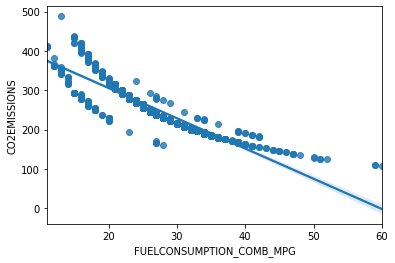

In [83]:
sns.regplot(x,y)
plt.show()

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =9)

In [85]:
SLR = LinearRegression()

In [86]:
SLR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
SLR.coef_, SLR.intercept_

(array([-7.55551017]), 455.21029185639406)

In [88]:
y_hat = SLR.predict(x_test)

In [89]:
SLR.score(x_test,y_test)
# or
from sklearn.metrics import r2_score
r2_score(y_test , y_hat)

0.8296188275661665

In [90]:
mean_squared_error(y_test, y_hat)

716.2301875077746

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


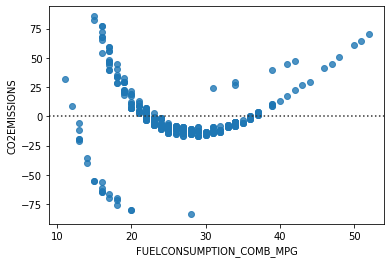

In [91]:
sns.residplot(x_test, y_test)
plt.show()

Text(0, 0.5, 'Emission')

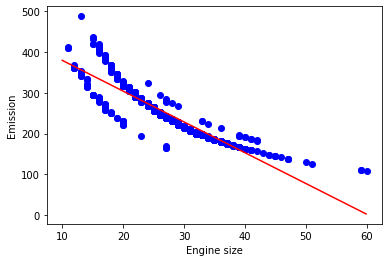

In [92]:
# just to draw the regresion line, although we drew it already before
xx=np.arange(10, 60, 0.1)
plt.scatter(x_train, y_train,  color='blue')
plt.plot(xx, SLR.coef_[0]*xx + SLR.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

**Using: FUELCONSUMPTION_CITY**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


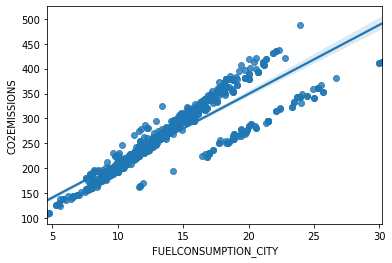

In [93]:
x = df[['FUELCONSUMPTION_CITY']]
y = df['CO2EMISSIONS']
sns.regplot(x,y)
plt.show()

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =9)
SLR = LinearRegression()
SLR.fit(x_train,y_train)
SLR.score(x_test,y_test)

0.822136258156651

In [95]:
mean_squared_error(y_test, y_hat)

716.2301875077746

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


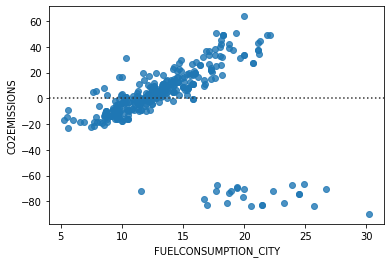

In [96]:
sns.residplot(x_test, y_test)
plt.show()

**Using both FUELCONSUMPTION_COMB_MPG and FUELCONSUMPTION_CITY**

In [97]:
x = df[['FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY']]
y = df['CO2EMISSIONS']

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =9)
SLR = LinearRegression()
SLR.fit(x_train,y_train)
SLR.score(x_test,y_test)

0.8529575884496381

In [99]:
mean_squared_error(y_test, y_hat)

716.2301875077746

# Polynomial Linear Regression
As we noticed from the plots in the previous section, it seems the FUELCONSUMPTION_COMB_MPG feature doesnt have linear relationship with the target feature so let us try the polynomial regresion.

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
import numpy as np


In [101]:
x = df[['FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =9)

In [102]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [103]:
poly = LinearRegression()

In [104]:
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
yp_hat = poly.predict(x_test_pr)

In [106]:
poly.score(x_test_pr,yp_hat )
# or (r2_score  might be better)
from sklearn.metrics import r2_score
r2_score(y_test , yp_hat)

0.8623144460726955

In [107]:
mean_squared_error(y_test, yp_hat)

578.7878361076628

In [108]:
poly.coef_

array([  0.        , -14.49058799,   0.12075255])

In [109]:
poly.intercept_

547.4669060247453

In [110]:
# function to plot the polynomial relationship
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])
# we create a new series of values to test the model prediction over the min-max of the data we have
    x=np.arange(xmin, xmax, 0.1)
    y_hat = lr.predict(poly_transform.fit_transform(x.reshape(-1, 1)))

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, y_hat, label='Predicted Function')
    # plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

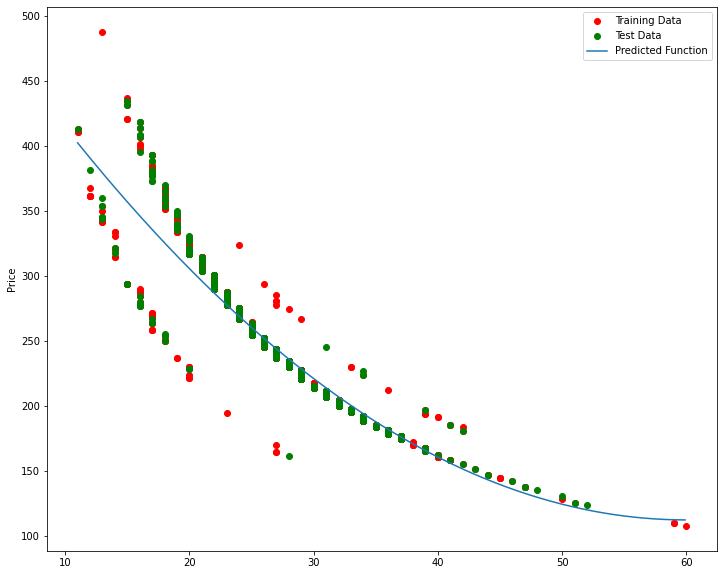

In [111]:
PollyPlot(x_train, x_test, y_train, y_test, poly,pr)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


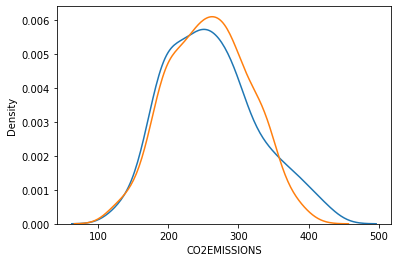

In [112]:
# Plot the distribution plot between the actual testset and the predicted testset
ax1 = sns.distplot(y_test, hist=False, label='orginal')
sns.distplot(yp_hat, hist=False, label='predicted', ax=ax1)
plt.show()

we can notice how we get a little bit improvment in the results comparing to use 'FUELCONSUMPTION_COMB_MPG' as a feature with linear relationship. So let us try all the features with polynomial regression.

In [113]:
# determine what features are most corrleated in the dataset
df_corr = df.corr()
filt = (df_corr.loc['CO2EMISSIONS']>0.70) | (df_corr.loc['CO2EMISSIONS']<-0.70)
features = df_corr[filt].index.values.tolist()
features

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [114]:
df_MLR = df[features]
y = df_MLR['CO2EMISSIONS']
x = df_MLR.drop('CO2EMISSIONS',axis=1)

In [115]:
df_MLR.head(2)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221


In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state =9)

In [117]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [118]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
poly.coef_

array([ 4.19010880e-09, -1.35534129e+02,  6.64289276e+01, -4.45873079e+02,
       -1.70793772e+02,  5.45841675e+02, -6.07856873e+01,  1.04163025e+01,
       -1.37709432e+01, -2.52702951e+01, -1.76103935e+01,  4.96725754e+01,
        2.90075028e+00,  7.05427536e-01, -1.97019485e+00, -4.84771855e+00,
        8.61558361e+00, -1.81824164e+00,  7.54225080e+01,  1.32136200e+02,
       -2.52431884e+02,  7.74344866e+00,  6.46434836e+01, -2.39518328e+02,
        2.09497497e+00,  2.19514711e+02, -7.50018876e+00,  5.66969717e-01])

In [120]:
poly.intercept_

1499.996515035127

In [121]:
yp_hat = poly.predict(x_test_pr)

In [122]:
poly.score(x_test_pr, y_test)
# or
r2_score(y_test, yp_hat)

0.9220821370395705

In [123]:
mean_squared_error(y_test, yp_hat)

327.54279596253974

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


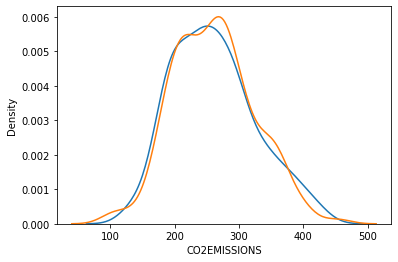

In [124]:
# Plot the distribution plot between the actual testset and the predicted testset

ax1 = sns.distplot(y_test, hist=False, label='orginal')
sns.distplot(yp_hat, hist=False, label='predicted', ax=ax1)
plt.show()

# Results Analysis
It seems many features are correlated but without linear relationship with the target feature and therefore, the polynomial regression provides us better results.

#Advantages & Disadvantages of using Polynomial Regression:
**Advantages**


*   Polynomial provides the best approximation of the relationship between the dependent and independent features (i.e. the input features and the target features).
*   A Broad range of function can be fit under it.
*   Polynomial basically fits a wide range of curvature.

**Disadvantages** 
* The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
SO, these are too sensitive to the outliers.
* In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

#Reference
https://towardsdatascience.com/introduction-to-linear-regression-and-polynomial-regression-f8adc96f31cb